In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.signal import find_peaks
import sympy


In [2]:
wavelength = 1064e-9 # m
c = 3e8 # m/s
L1_0 = 1 # m, to be varied
L2_0 = 1
delta_L1 = 50e-9 # m, the variation
delta_L2 = 0
L1 = L1_0 + delta_L1 # m, total length
L2 = L2_0 + delta_L2 # fixed
k = 2 * np.pi / wavelength

# mirror specs
t1, t2, t3 = np.sqrt(0.1), np.sqrt(0.1), np.sqrt(0.1)
r1, r2, r3 = np.sqrt(1 - t1**2), np.sqrt(1 - t2**2), np.sqrt(1 - t3**2)

# frequency range
delta_nu = np.linspace(-40e6, 40e6, 500)
omega = 2 * np.pi * delta_nu



# exps
exp_L1 = np.exp(2j *( omega / c)* L1 )
exp_L2 = np.exp(2j * (omega/c) * L2 )
exp_total_1 = np.exp(1j * (omega/c) * (L1 + L2) )
exp_total_2 = np.exp(2j * (omega/c) * (L1 + L2) )


# the formula
nominator = - t1 * t2 * t3 * exp_total_1
denominator = exp_total_2 - r1 * r2 * exp_L2 - r2 * r3 * exp_L1 + r1 * r3 * (r2 **2 + t2 **2)
transmission_total = abs(nominator/denominator) ** 2

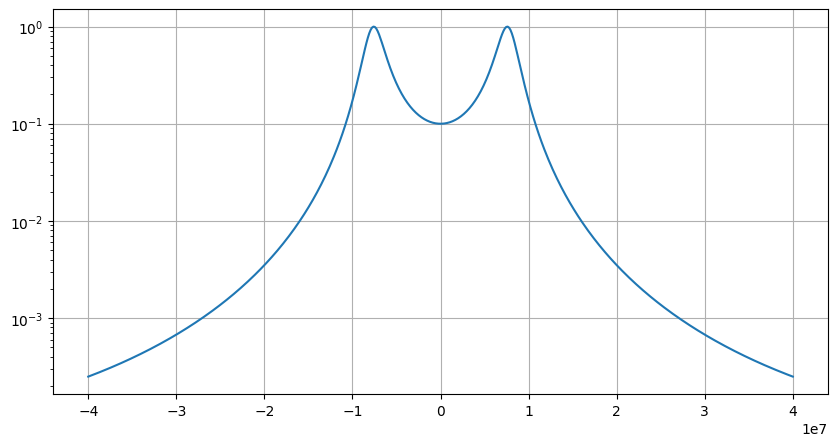

In [3]:
plt.figure(figsize=(10, 5))
plt.plot(delta_nu, transmission_total)
plt.yscale("log")
plt.grid()

# basically what happens is that the peaks shift wrt to each other rather than along the x axis

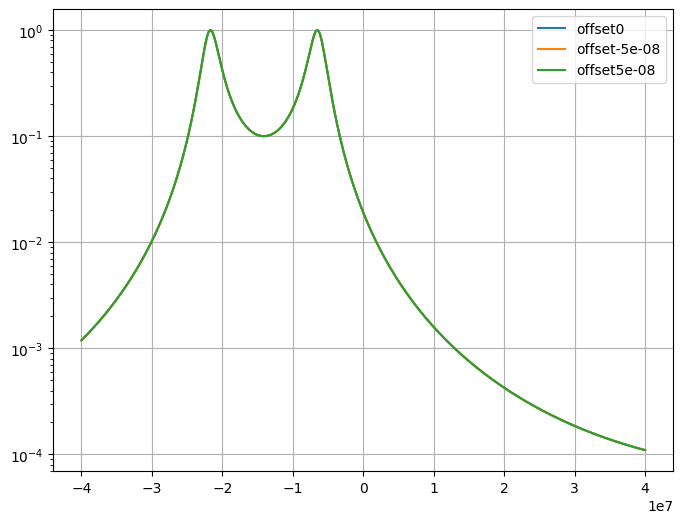

In [7]:
delta_L1_arr = [0, -50e-9, 50e-9]
delta_L2_arr = [0, -50e-9, 50e-9]
plt.figure(figsize=(8, 6))
plt.yscale("log")
plt.grid()
peak_positions_pos = []

for delta in delta_L1_arr:

    exp_L1 = np.exp(2j * omega * (L1_0 + delta) /c)
    exp_L2 = np.exp(2j * omega * (L2_0)/c)
    exp_total_1 = np.exp(1j * omega * (L1_0 + L2 + 2* delta)/c)
    exp_total_2 = np.exp(2j * omega * (L1 + L2 + 2 *delta)/c)


    # the formula
    nominator = - t1 * t2 * t3 * exp_total_1
    denominator = exp_total_2 - r1 * r2 * exp_L2 - r2 * r3 * exp_L1 + r1 * r3 * (r2 **2 + t2 **2)
    transmission_total = abs(nominator/denominator) ** 2
    plt.plot(delta_nu, transmission_total, label = "offset" + str(delta))
    
# plt.xlim((min(delta_nu), max(delta_nu)))
plt.legend()

# basically the shift is tiny for 50 e-9 i have no clue how they get a big one in the paper honestly
    

ValueError: x and y must have same first dimension, but have shapes (1, 500) and (500,)

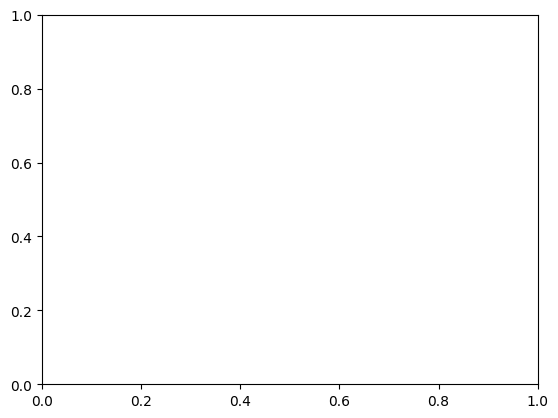

In [515]:
# maybe one day ill use this ugh

det_pos = c / (4 * np.pi * (L1_0 + delta_L1_array)) * np.arccos((r1 * r2 * (1 + r3**2 * (r2**2 + t2**2)) + r2 * r3 * (1+ r1**2 * (r2**2 +t2**2)))/(4 * r1 * r3 * (r2**2+t2**2)))
det_neg = position_pos = - c / (4 * np.pi * (L1_0 + delta_L1_array)) * np.arccos((r1 * r2 * (1 + r3**2 * (r2**2 + t2**2)) + r2 * r3 * (1+ r1**2 * (r2**2 +t2**2)))/(4 * r1 * r3 * (r2**2+t2**2)))

peaks_list =[]

for delta in delta_L1_array:

    # account for the frequency shift
    order = 2 * (L1_0+L2 + delta) / wavelength
    omega = 2 * np.pi * delta_nu
    omega_0 = c * 2 * np.pi / (2 * (L1_0 + L2 + delta))
    omega = omega +  order * omega_0 * delta / (2 * L1)


    
    exp_L1 = np.exp(2j * omega * (L1_0 + delta) /c)
    exp_L2 = np.exp(2j * omega * L2/c)
    exp_total_1 = np.exp(1j * omega * (L1_0 + L2 + delta)/c)
    exp_total_2 = np.exp(2j * omega * (L1 + L2 + delta)/c)


    # the formula
    nominator = - t1 * t2 * t3 * exp_total_1
    denominator = exp_total_2 - r1 * r2 * exp_L2 - r2 * r3 * exp_L1 + r1 * r3 * (r2 **2 + t2 **2) + broadening
    transmission_total = abs(nominator/denominator) ** 2
    # plt.plot(delta_nu, transmission_total, label = "offset" + str(delta))

    peaks, _ = find_peaks(transmission_total)
    peak_freqs = delta_nu[peaks]

    peaks_list.append(peak_freqs)
    
    # positive_peak = peak_freqs[peak_freqs > 0][0] if len(peak_freqs[peak_freqs > 0]) > 0 else None
    # negative_peak = peak_freqs[peak_freqs < 0][-1] if len(peak_freqs[peak_freqs < 0]) > 0 else None
    peak_positions_pos.append(positive_peak)

plt.plot(np.array(peaks_list).T[:1], delta_L1_array)



In [510]:
peaks_list = np.array(peak_list)
peaks_list = peaks_list[1:]
print(peaks_list[0])

[13547094.18837675 28617234.46893787]


In [386]:
delta_nu = np.linspace(-40e6, 40e6, 300)
omega = 2 * np.pi * delta_nu
offset = omega * (100e-9) / (2 * L1_0)


#adjust?
exp_L1_bis = np.exp(2j * omega * L1_0 /c)
exp_L2_bis = np.exp(2j * omega * L2/c)
exp_total_1_bis = np.exp(1j * omega * (L1_0 + L2)/c)
exp_total_2_bis = np.exp(2j * omega * (L1_0 + L2)/c)

# the formula
nominator_bis = - t1 * t2 * t3 * exp_total_1_bis
denominator_bis = exp_total_2_bis - r1 * r2 * exp_L2_bis - r2 * r3 * exp_L1_bis + r1 * r3 * (r2 **2 + t2 **2)
transmission_total_bis = abs(nominator_bis/denominator_bis) ** 2

# find peaks
peaks1, _ = find_peaks(transmission_total_bis, height=0.1)

In [517]:
delta_L1_array = np.linspace(-150e-9, 150e-9, 500)


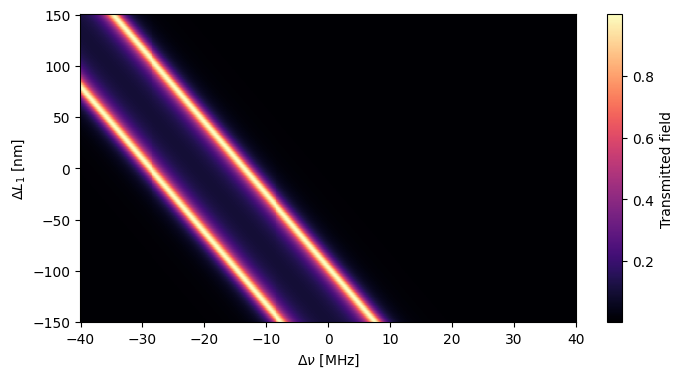

In [518]:
Delta_nu, Delta_L1 = np.meshgrid(delta_nu, delta_L1_array)
Transmission = np.zeros_like(Delta_nu)

for i, delta in enumerate(delta_L1_array):
    L1 = L1_0 + delta
    order = 2 * (L1 + L2) / wavelength
    omega_0 = c * 2 * np.pi / (2 * (L1 + L2))

    omega_shifted = omega + order * omega_0 * delta / (2 * L1)
    
    exp_L1 = np.exp(2j * omega_shifted * (L1) / c)
    exp_L2 = np.exp(2j * omega_shifted * L2 / c)
    exp_total_1 = np.exp(1j * omega_shifted * (L1 + L2 ) / c)
    exp_total_2 = np.exp(2j * omega_shifted * (L1 + L2 ) / c)


    numerator = -t1 * t2 * t3 * exp_total_1
    denominator = exp_total_2 - r1 * r2 * exp_L2 - r2 * r3 * exp_L1 + r1 * r3 * (r2**2 + t2**2)
    Transmission[i, :] = np.abs(numerator / denominator) ** 2


plt.figure(figsize=(8, 4))
mesh = plt.pcolormesh(Delta_nu / 1e6, Delta_L1 * 1e9, Transmission, shading='auto', cmap="magma")
# plt.contour(Delta_nu / 1e6, Delta_L1 * 1e9, Transmission, levels=15, colors="white", linewidths=0.4)
cbar = plt.colorbar(mesh, label="Transmitted field")


plt.xlabel(r"$\Delta \nu$ [MHz]")
plt.ylabel(r"$\Delta L_1$ [nm]")

plt.show()


### the original paper way

In [567]:
L0 = 0.25
delta_L1 = 50e-9
delta_L2 = -40e-9
delta = delta_L1 + delta_L2

L1 = L0 + delta_L1
L2 = L0 + delta_L2

L_minus = delta_L1 - delta_L2
L_plus = delta_L1 + delta_L2

# frequency detuning range
delta_nu = np.linspace(-40e6, 40e6, 10000)


# omega correction
order = 2 * (L1_0+L2 + 2 * delta) / wavelength
omega = 2 * np.pi * delta_nu
omega_0 = c * 2 * np.pi / (2 * (L1_0 + L2 + 2 * delta))
omega = omega +  order * omega_0 * 2*delta / (2 * L1)

tau = L0/c

# approx, im trying exact
# Z1 = np.exp(-1j * omega * tau - 1j * omega_0 * delta_L1 / c)
# Z2 = np.exp(- 1j * omega * tau - 1j * omega_0 * delta_L2 / c)

# exact
Z1 = np.exp(- 1j * omega * L1 / c)
Z2 = np.exp( -1j * omega * L2 / c)

# transmission coefficient

nominator = - 1j * t1**2 * t2 * Z1 * Z2
denominator = 1 - r1 * r2 * (Z1 ** 2 + Z2 ** 2) + r1**2 * Z1**2 * Z2 **2 
transmission = abs(nominator/denominator) ** 2

In [570]:
def transmission_vs_detuning(L0, delta_L1, delta_L2, color_scheme):
    """
    L0 - length of one cavity (this is symmetric for now), in (centi)meter scale, int
    delta_L1 - offset of mirror one, in nanometers, list
    delta_L2 - offset of mirror two, in nanometers (biggest change if =! delta_L1), list
    color_scheme - :D, list
    """

    plt.figure(figsize=(8, 6))
    plt.yscale("log")
    plt.grid()

    
    for (dl1, dl2, color) in zip(delta_L1, delta_L2, color_scheme):

        L1 = dl1 + L0
        L2 = dl2 + L0

        order = 2 * (2* L0 + dl1 + dl2) / wavelength
        omega = 2 * np.pi * delta_nu
        omega_0 = c * 2 * np.pi / (2 * (L0 + L0 + dl1 + dl2))
        omega = omega +  order * omega_0 * (dl1 + dl2) / (2 * L0)

        tau = L0/c

        # exponentials, phase shift picked up due to the mirror displacement
        Z1 = np.exp(- 1j * omega * L1 / c)
        Z2 = np.exp( -1j * omega * L2 / c)

        # transmission coefficient

        nominator = - 1j * t1**2 * t2 * Z1 * Z2
        denominator = 1 - r1 * r2 * (Z1 ** 2 + Z2 ** 2) + r1**2 * Z1**2 * Z2 **2 
        transmission = abs(nominator/denominator) ** 2

        plt.plot(delta_nu, transmission, c = color, label = "delta L1 = " + str(dl1) + " delta L2 = " + str(dl2))
        
    plt.legend(loc = "lower left")
            

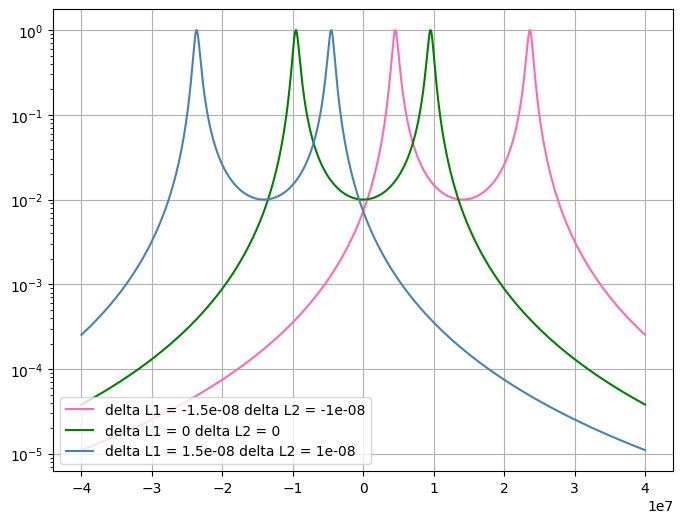

In [576]:
colors = ["hotpink", "green", "steelblue"]

t1, t2, t3 = np.sqrt(0.01), np.sqrt(0.01), np.sqrt(0.01)
r1, r2, r3 = np.sqrt(1 - t1**2), np.sqrt(1 - t2**2), np.sqrt(1 - t3**2)

array_delta_L1 = [-15e-9, 0, 15e-9]
array_delta_L2 = [-10e-9, 0, 10e-9]

transmission_vs_detuning(0.25, array_delta_L1, array_delta_L2, colors)

ValueError: x and y must have same first dimension, but have shapes (10000,) and (500,)

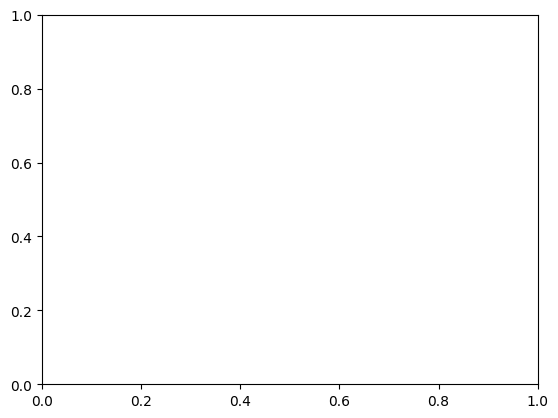

In [572]:
plt.plot(delta_nu, transmitted_power)
plt.yscale("log")

### ok moving on....

In [204]:
rho_1, rho_2 = 1.1, 1.1 # radii of curvature, must be bigger than the separation length
n = 1 # index of refraction

g_1 = 1 - L2 / rho_1
g_2 = 1 - L2 / rho_2


print(g_1 * g_2)

0.00826446280991736
